# Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not

# IMPORTING LIBRARIES

In [477]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas_profiling import ProfileReport

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Importing file and analysing raw data

In [449]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [450]:
#no. of rows and columns
print('No. of rows and columns are:',titanic_data.shape)

No. of rows and columns are: (891, 12)


# a) DATA DESCRIPTION

1.Survived: 0 = Did not survive, 1 = Survived

2.Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

3.Sex: Male or female

4.Age: Age in years

5.SibSp: Number of siblings or spouses aboard the titanic

6.Parch: Number of parents or children aboard the titanic

7.Ticket: Passenger ticket number

8.Fare: Passenger fare

9.Cabin: Cabin number

10.Embarked: Point of embarkation 

# b) Exploratory Data Analysis (EDA)

In [451]:
#getting some information about the data

print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# observation : 
              a)As we observe that there are 5 object class,5 integer class and 2 float class in the data set.
              b)there are some missing value in the age dataset and huge data set are missing for cabin dataset.
               lets plot a graph to observe missing value
        

In [452]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# observation :
    1. we observe that count of age is less than others indicates missing values.
    2. huge jump in fare fron 75% to 100%.
    3. Age of passenger varies from 4 month to 80 years

In [453]:
#missing data calculation
tit_null=titanic_data.isnull().sum().sort_values(ascending=False)
tit_null

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [454]:
#calculating percentage of missing value of each column
m_val = titanic_data.isnull().sum()/titanic_data.isnull().count()*100
null_df = pd.DataFrame({"missing_value":tit_null,'percentage':m_val.sort_values(ascending=False)})
null_df.head()

,missing_value,percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000


# observation:
1. Nearabout 77 percent of dataset are missing for cabin class which is huge in number
2. 19% of data are missing in age column which can be properly handled.
3. 2 values are missing for embarked column

<AxesSubplot:>

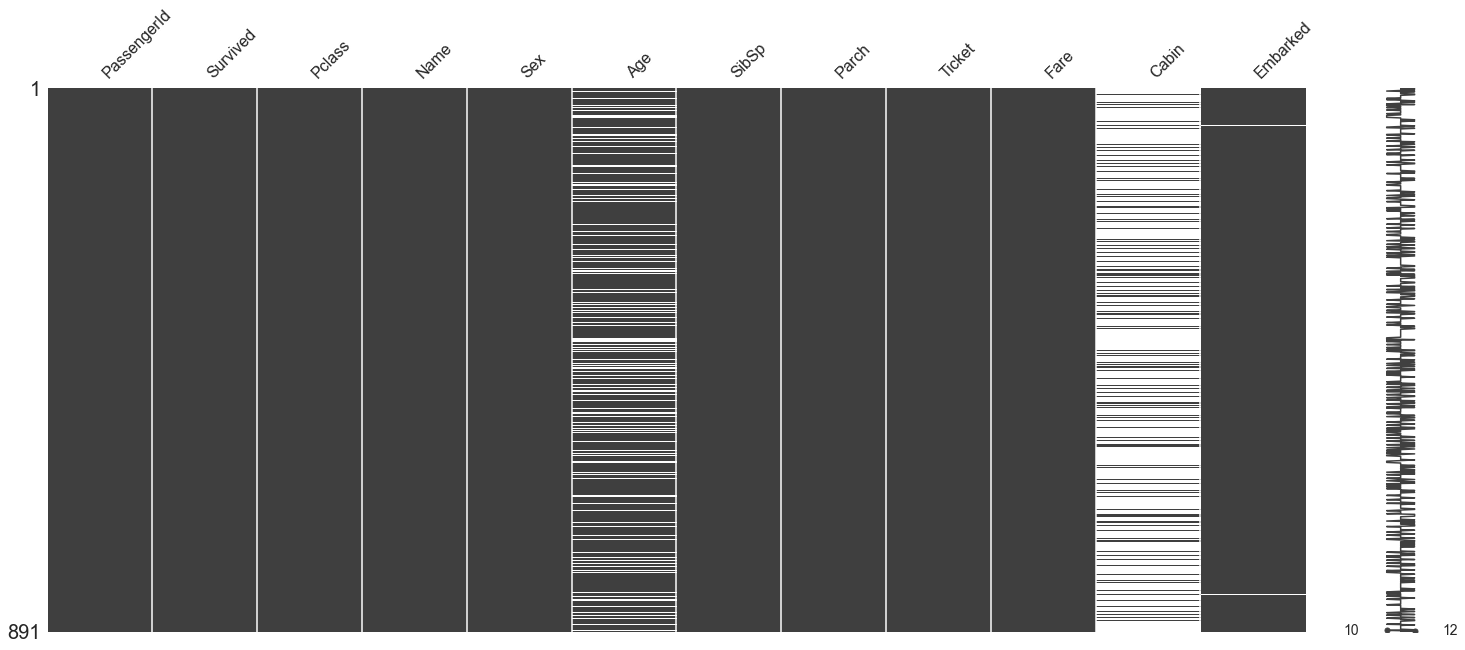

In [455]:
ms.matrix(titanic_data)

Text(0.5, 1.0, 'Bar graph clearly showing missing value')

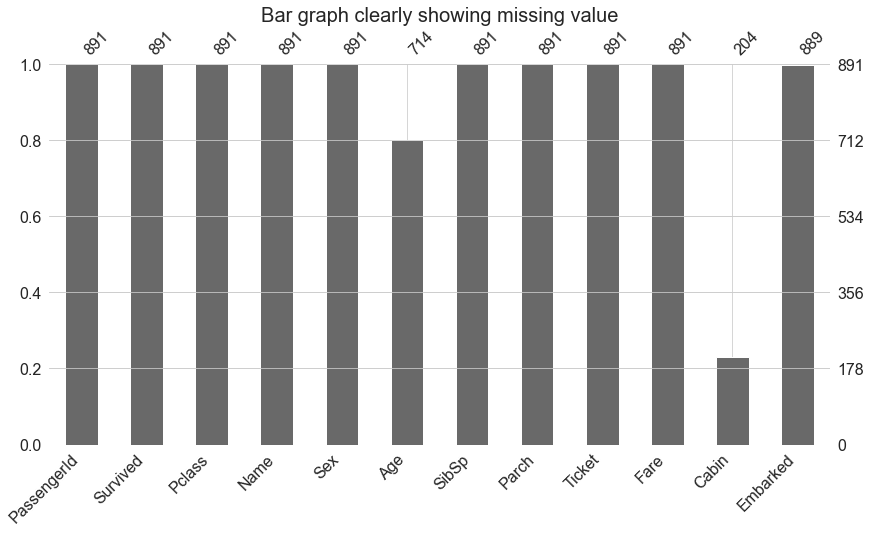

In [456]:
ms.bar(titanic_data,figsize=(14,7))
plt.title("Bar graph clearly showing missing value",size=20)

<AxesSubplot:>

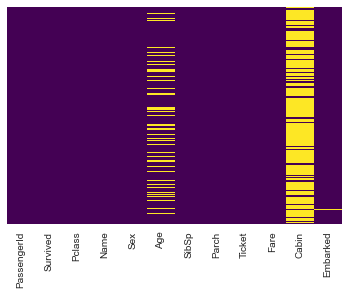

In [457]:
#using heatmap
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# OBSERVATION==Above three plot confirm our  observation that age and cabin has a missing value.roughly19 to 20 percent data is missing in the age column but hige data are missing in cabin dataset.



# Let's continue on by visualizing some more of the data

# A) Categorical variables
Categorical variables in our dataset are Sex, Pclass and Embarked.

# COMPARISON WITH SURVIVAL RATE

<AxesSubplot:xlabel='Survived', ylabel='count'>

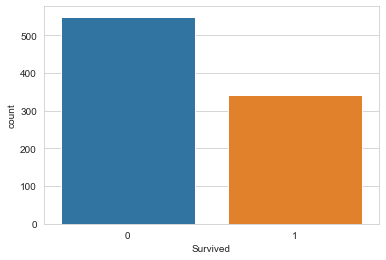

In [458]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_data)

above indicates death of  more than 550 person and 340-350 survived.

In [459]:
# Value counts of the sex column

titanic_data['Survived'].value_counts(dropna = False)

# Comment: There are more  passengers dead than alive on  titanic

0    549
1    342
Name: Survived, dtype: int64

# COMPARISON WITH GENDER

<AxesSubplot:xlabel='Survived', ylabel='count'>

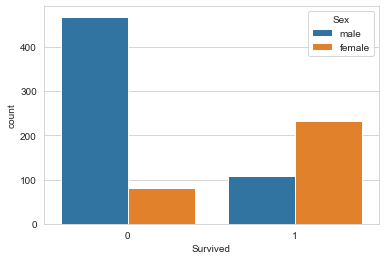

In [460]:
#now comparing data between sex(male -female) and survival.
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue="Sex",data=titanic_data)

Above graph represents more number of death of male person as compare to female whereas survival rate of female is more than male.

In [461]:
# Value counts of the sex column

titanic_data['Sex'].value_counts(dropna = False)

# Comment: There are more male passengers than female passengers on titanic

male      577
female    314
Name: Sex, dtype: int64

# COMPARISON WITH PCLASS

<AxesSubplot:xlabel='Survived', ylabel='count'>

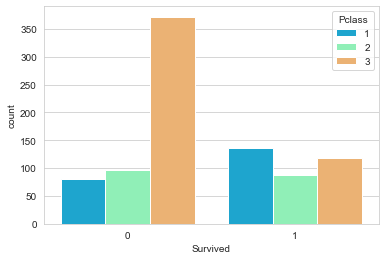

In [462]:
#comparing pclss with survival
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic_data,palette='rainbow')

# survival rate : Pclass1 > Pclass3 > Pclass2
# death rate : Pclass3 > Pclass2 > Pclass1

In [463]:
# Value counts of the pclass column

titanic_data['Pclass'].value_counts(dropna = False)

# Comment: There are more number of passengers in p3 class as comparison to other class.

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [464]:
# Mean of survival by passenger class

titanic_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# COMPARISON WITH EMBARKED

In [465]:
# Value counts of the Embarked column 

titanic_data['Embarked'].value_counts(dropna = False)

# Comment: Two missing values in the Embarked column

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [466]:
# Mean of survival by point of embarkation

titanic_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

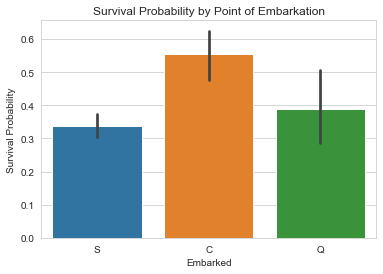

In [467]:
sns.barplot(x = 'Embarked', y ='Survived', data = titanic_data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

Survival probability is highest for location C and lowest for location S.

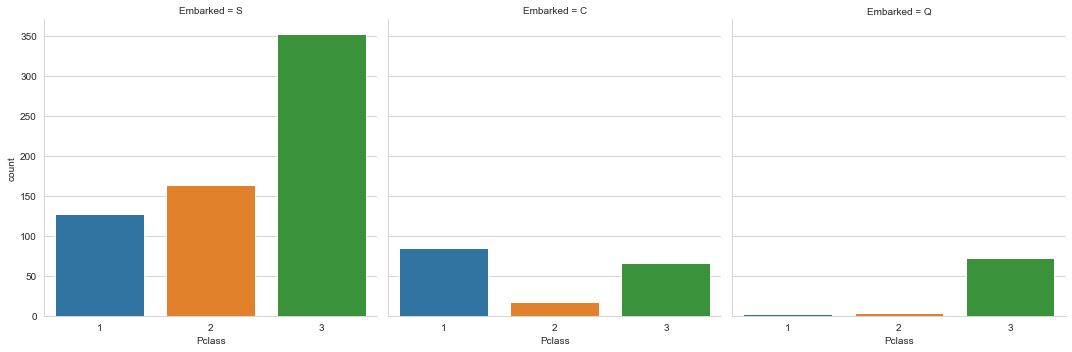

In [468]:
sns.factorplot('Pclass', col = 'Embarked', data = titanic_data, kind = 'count')

Location S has the most third class passengers whereas location C has the most first class passengers

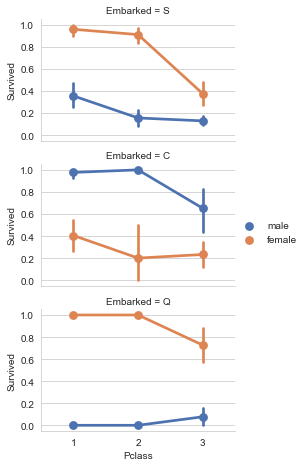

In [471]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(titanic_data, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

# B)NUMERICAL VARIABLES

# COMPARISON WITH AGE

<AxesSubplot:xlabel='Age'>

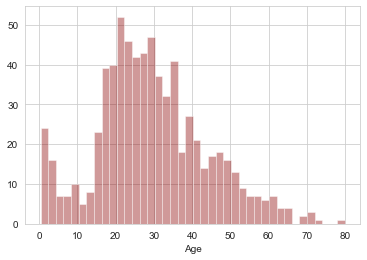

In [472]:
##comparing age with survival
sns.distplot(titanic_data['Age'].dropna(),kde=False,color='darkred',bins=40)

# observation = passengers age ranging from 0 to 80yrs and survival rate more between age group 15yrs to 40yrs

In [473]:
# Value counts of the age column

titanic_data['Age'].value_counts(dropna = False)

# Comment: There are more male passengers than female passengers on titanic

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

total 177 nan value exists in age column which have to be manipulated

# COMPARISON WITH SibSp

<AxesSubplot:xlabel='SibSp', ylabel='count'>

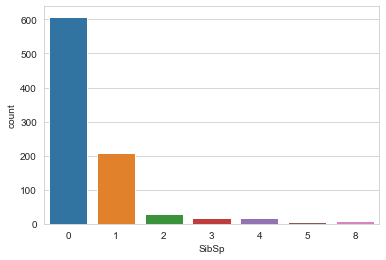

In [474]:
sns.countplot(x='SibSp',data=titanic_data)

<AxesSubplot:>

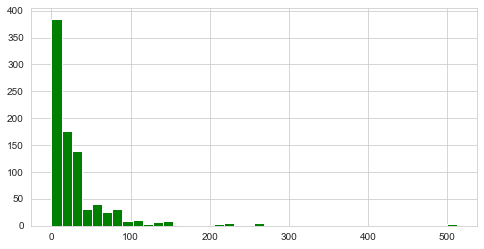

In [475]:
titanic_data['Fare'].hist(color='green',bins=40,figsize=(8,4))

# DATA CLEANING

In [476]:
#passengerid,name,cabin and ticket has been dropped as they are categorical form whichis not readable by machine learning.
#passenger id and ticket no has nothing to do with survival prediction

titanic_data = titanic_data.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'])

In [322]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [323]:
titanic_data.shape

(891, 8)

In [313]:
#checking unique values for Sex and Embarked column.
print('UNIQUE VALUE ARE:',titanic_data['Sex'].unique())
print('UNIQUE VALUE ARE:',titanic_data['Embarked'].unique())

UNIQUE VALUE ARE: ['male' 'female']
UNIQUE VALUE ARE: ['S' 'C' 'Q' nan]


In [314]:
#calling label encoder
from sklearn.preprocessing import LabelEncoder

In [315]:
lab_enc = LabelEncoder()

In [316]:
#encoding sex and embarked column
#Encode the Sex column
titanic_data['Sex'] = lab_enc.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = lab_enc.fit_transform(titanic_data['Embarked'])

In [317]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [318]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

# observation =  now all the features are in numerical form and readable by machine learning.

In [319]:
titanic_data.shape

(891, 8)

In [320]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [324]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [325]:
titanic_data["Age_mean"]=titanic_data["Age"].fillna(titanic_data['Age'].mean())

<AxesSubplot:xlabel='Age_mean', ylabel='Density'>

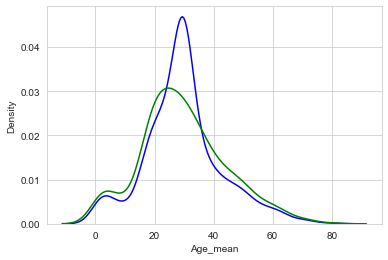

In [327]:
sns.kdeplot(titanic_data['Age_mean'], color = 'blue', label = "Mean")
sns.kdeplot(titanic_data["Age"], color = 'green', label = 'Original')

In [337]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [338]:
titanic_data = titanic_data.dropna(subset = ['Age'])

<AxesSubplot:>

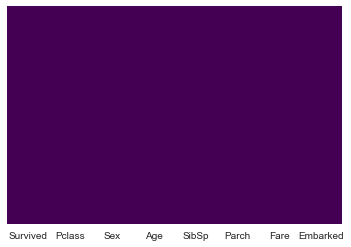

In [347]:
#using heatmap
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# no null value or missing value exist now.

In [339]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# observation = we observe that nullvalue from the age data set has been removed .

In [340]:
titanic_data.shape

(714, 8)

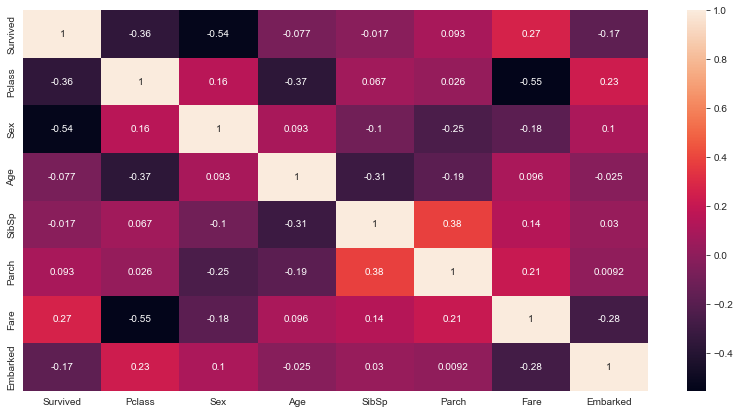

In [342]:
plt.figure(figsize = (14,7))
sns.heatmap(titanic_data.corr(), annot = True)
plt.show()

# age has negative correlation with embarked,parch and sbsp.

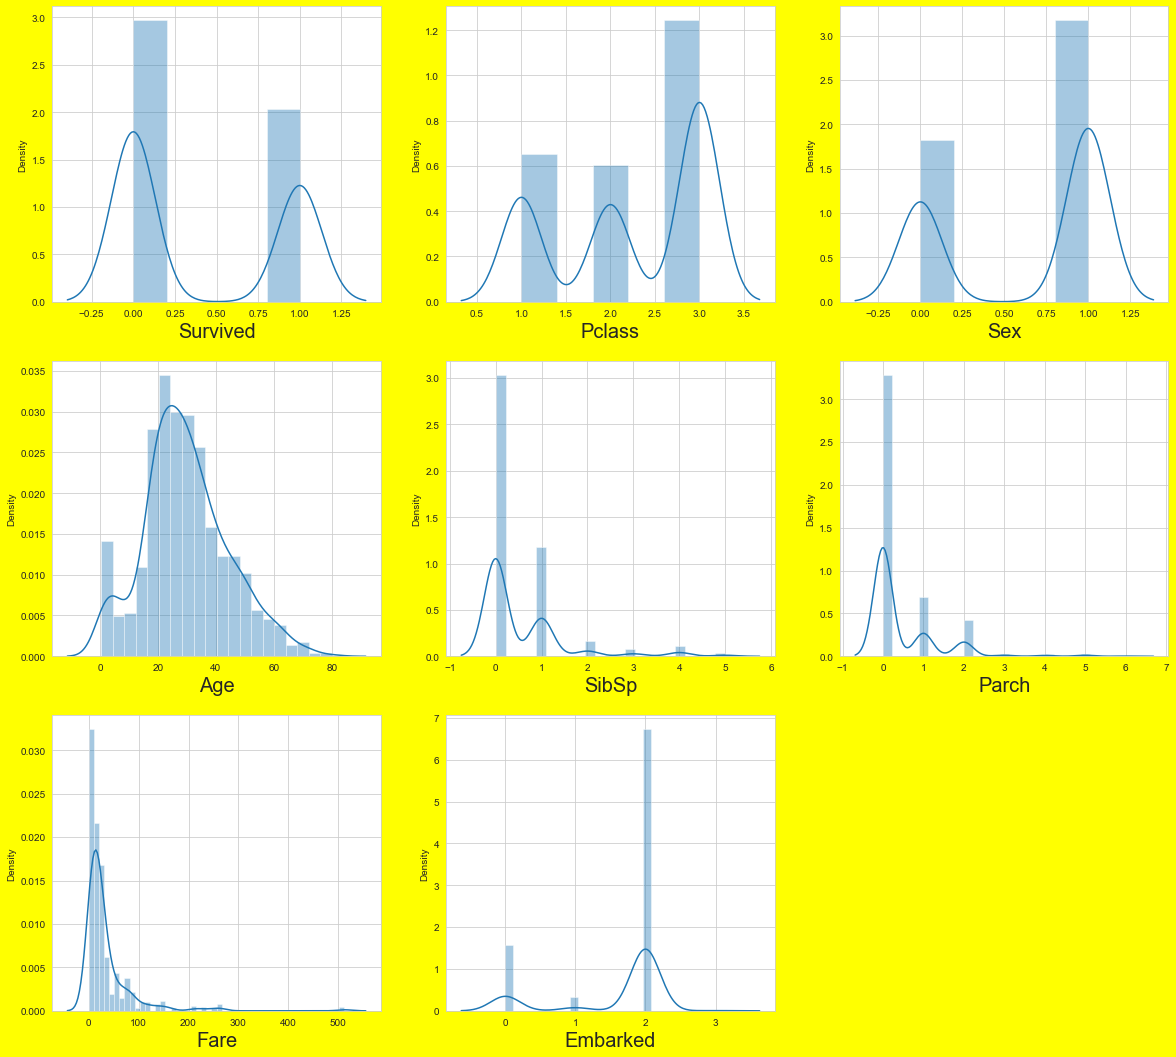

In [349]:
plt.figure(figsize=(20,25),facecolor="yellow")
plotnumber=1
for column in titanic_data:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(titanic_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# skewness has been observed in fare column which is to be handled properly.

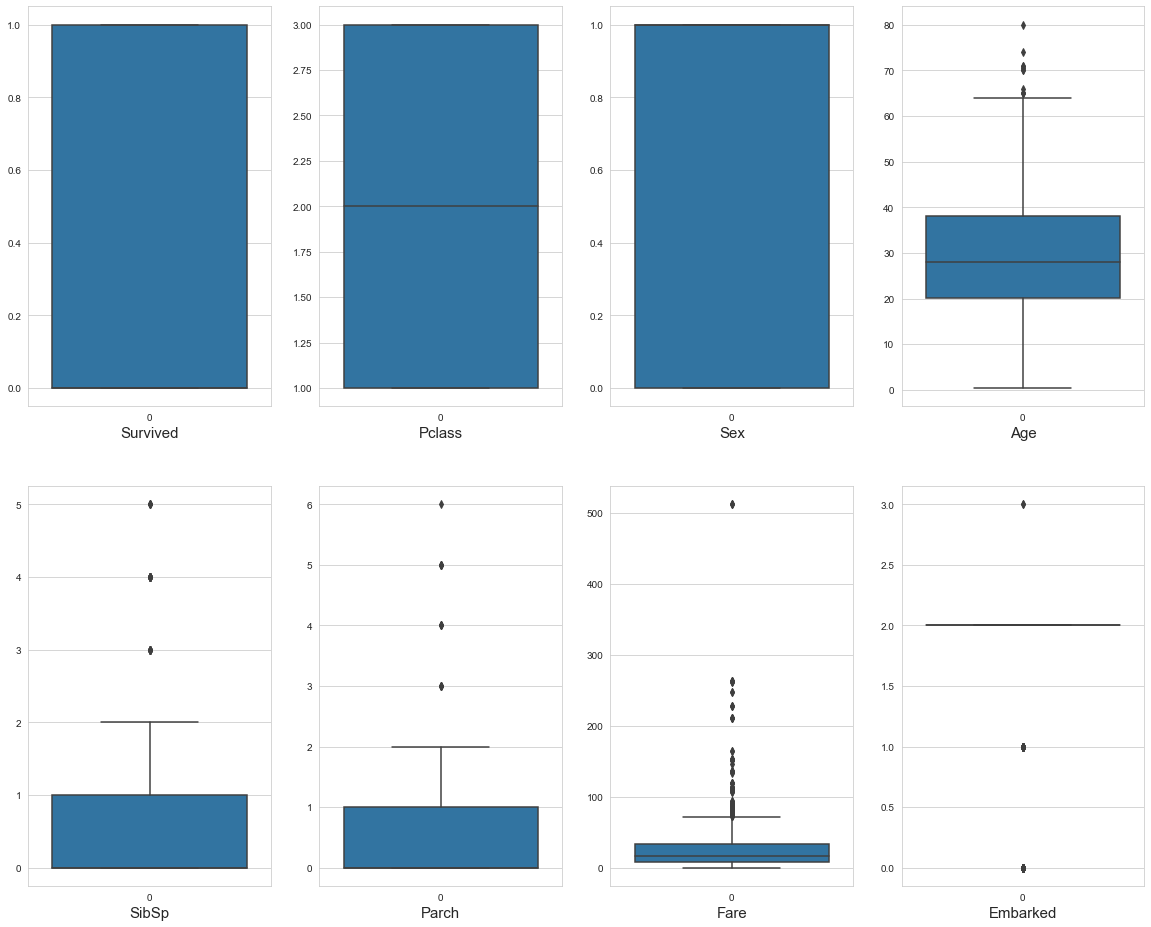

In [350]:
#using boxplot to remove outliers

plt.figure(figsize=(20,25))
graph = 1
for column in titanic_data:
    if graph<=12:
        plt.subplot(3,4,graph)
        ax=sns.boxplot(data=titanic_data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

# outliers exists in every column but cannot be removed this time as removing these will affects survival predictibility as rich people 
are mostly aged in this ship and they have been given preferences for survival.

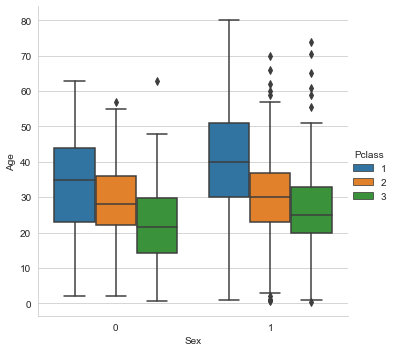

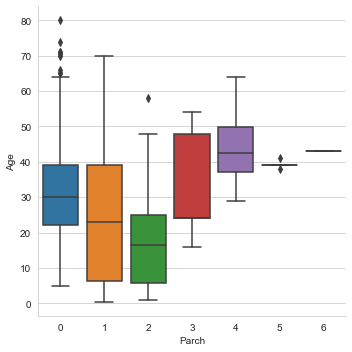

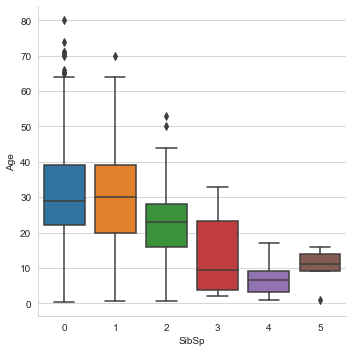

In [351]:
sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = titanic_data)
sns.factorplot(y = 'Age', x = 'Parch', kind = 'box', data = titanic_data)
sns.factorplot(y = 'Age', x = 'SibSp', kind = 'box', data = titanic_data)

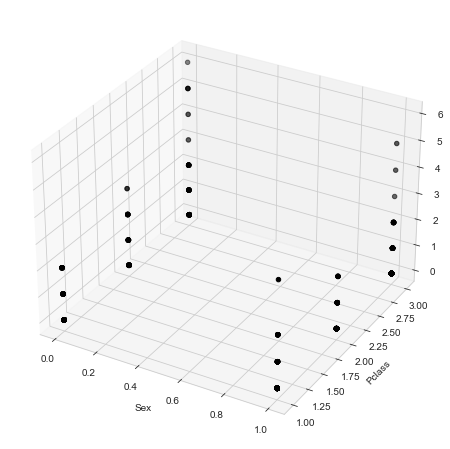

In [354]:
fig = plt.figure(figsize = (16,8))
ax = plt.axes(projection = '3d')
ax.set_xlabel('Sex')
ax.set_ylabel('Pclass')
ax.set_label('Parch')
ax.scatter3D(titanic_data["Sex"],titanic_data["Pclass"],titanic_data["Parch"],c = 'black')
plt.show()

# SUMMARY OF EDA USING PROFILE LIBRARY

In [478]:
profile = ProfileReport(titanic_data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# DATA TRANSFORMATION

Text(0.5, 1.0, 'Passenger Fare Distribution')

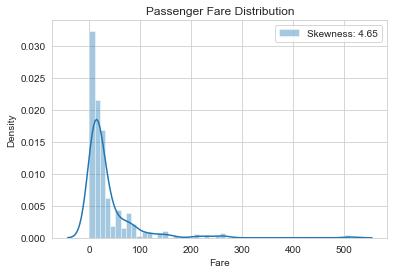

In [355]:
# Passenger fare distribution IS TOO MUCH SKEWED.



sns.distplot(titanic_data['Fare'], label = 'Skewness: %.2f'%(titanic_data['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [357]:
# Apply log transformation to Fare column to reduce skewness

titanic_data['Fare'] = titanic_data['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

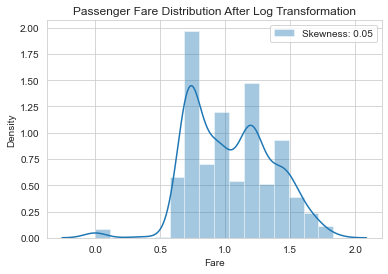

In [358]:
# Passenger fare distribution after log transformation

sns.distplot(titanic_data['Fare'], label = 'Skewness: %.2f'%(titanic_data['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

# we observe that skweness chaged from 4.65 to .05

# MODELLING

Since Titanic is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our model to make predictions. 

# following modelling technique has been used

1. Logistic regression
2. Support vector machines
3. K-nearest neighbours
4. Gaussian naive bayes
5. Perceptron
6. Linear SVC
7. Stochastic gradient descent
8. Decision tree
9. Random forest
10. ROC-AUC COURVE

In [362]:
#Spliting data into x and y variable.
X = titanic_data.drop(columns = ['Survived'])
y = titanic_data['Survived']

In [363]:
from sklearn.preprocessing import StandardScaler

In [364]:
#scaling the dataset

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[ 0.91123237,  0.75905134, -0.53037664, ..., -0.50589515,
        -1.14242276,  0.51292383],
       [-1.47636364, -1.31743394,  0.57183099, ..., -0.50589515,
         1.28899161, -2.04810845],
       [ 0.91123237, -1.31743394, -0.25482473, ..., -0.50589515,
        -1.0031197 ,  0.51292383],
       ...,
       [-1.47636364, -1.31743394, -0.73704057, ..., -0.50589515,
         0.57054666,  0.51292383],
       [-1.47636364,  0.75905134, -0.25482473, ..., -0.50589515,
         0.57054666, -2.04810845],
       [ 0.91123237,  0.75905134,  0.15850313, ..., -0.50589515,
        -1.03749055, -0.76759231]])

In [365]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,0.683603,2
1,1,0,38.0,1,0,1.450832,0
2,3,0,26.0,0,0,0.727559,2
3,1,0,35.0,1,0,1.379314,2
4,3,1,35.0,0,0,0.735091,2


In [366]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [372]:
#now splitting the data into train and test

X_train,X_test,y_train,y_test = train_test_split (X_scaled, y, test_size = 0.2, random_state = 45)

# Fit model to data and make predictions

In [373]:
#Logistic regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

80.91

In [374]:
#support vector classifier

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

84.59

In [375]:
#K-nearest neighbours

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

84.94

In [376]:
#Gaussian naive bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

77.58

In [377]:
#perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

64.62

In [378]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

80.04

In [379]:
#Stochastic gradient descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

76.18

In [380]:
#Decision tree classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.77

In [381]:
#Random forest

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

98.77

# Model evaluation and hyperparameter tuning

In [389]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,98.77
1,Decision Tree,98.77
2,KNN,84.94
3,Support Vector Machines,84.59
4,Logistic Regression,80.91
5,Linear SVC,80.04
6,Naive Bayes,77.58
7,Stochastic Gradient Decent,76.18
8,Perceptron,64.62


In [391]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())


len(classifiers)

9

In [392]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = 'accuracy', cv = 9))

In [393]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [394]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 
                                                                                                       'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.810957,0.048614,Support Vector Machines
1,0.802166,0.061087,Logistic Regression
2,0.798721,0.070280,Linear SVC
3,0.793513,0.044690,KNN
4,0.786238,0.061309,Random Forest
5,0.773947,0.051228,Decision Tree
6,0.772377,0.039507,Gausian Naive Bayes
7,0.772211,0.066172,Stochastic Gradient Descent
8,0.709077,0.073534,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

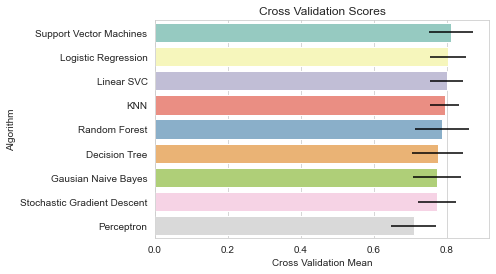

In [395]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

# As we can see, support vector machines has the highest cross validation mean and thus we will proceed with this model.

# Hyperparameter tuning for SVM

In [396]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.696 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.632 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.658 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.649 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.816 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.763 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.825 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.772 total time=   0.3s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.772 total time=   0.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.675 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.711 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.798 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.763 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.789 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.781 total time=   0.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.825 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.789 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [397]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=1000, gamma=0.01)


In [398]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

83.36

In [433]:
# Mean cross validation score

cross_val_score(svc, X_train, y_train, scoring = 'accuracy', cv = 8)

array([0.55555556, 0.59722222, 0.55555556, 0.5915493 , 0.5915493 ,
       0.56338028, 0.57746479, 0.5915493 ])

In [399]:
# Survival predictions by support vector classifier

y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [400]:
len(y_pred)

143

# Hyper papameter tuning on Logistic Regression

In [419]:
value = ['Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Fare', 'Embarked']

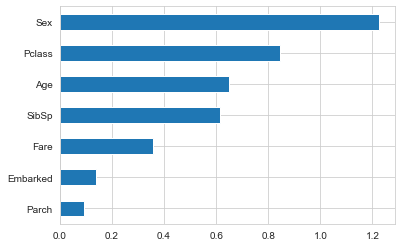

In [420]:
#Checking Feature coefficient
logreg.fit(X_train, y_train)
coef = logreg.coef_
feature_coef = pd.Series(coef[0], index = value)
sort_feature_coef = feature_coef.abs().sort_values()
sort_feature_coef.plot.barh()
plt.show()

In [422]:
#Fitting Logistic Regression with selected features which has high coefficient with the model
x = titanic_data[['Sex', 'Pclass', 'Age', 'SibSp', 'Embarked']]
y = titanic_data['Survived']

#Scaling data
x = sc.fit_transform(x)

#Spliting dataset x and y dataset into train and test 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

#Fitting model
logreg.fit(x_train, y_train)

LogisticRegression(C=0.0001, penalty='none')

In [423]:
#Model confidence/Accuracy without hyper parameter tuning
def metric_score(logreg,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = logreg.predict(x_train)
        print('\n===================================Train Result=================================')
        print(f"Accurancy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
    elif train == False:
        pred = logreg.predict(x_test)
        
        print('\n====================================Test Result================================')
        print(f"Accurancy Score: {accuracy_score(y_test,pred) *100:.2f}%")
        
        print('\n\n Test Classification Report \n', classification_report(y_test,pred,digits = 2))

In [424]:
#Call the function
metric_score(logreg,x_train,x_test,y_train,y_test, train = True)

metric_score(logreg,x_train,x_test,y_train,y_test, train = False)


===================================Train Result=================================
Accurancy Score: 80.21%

====================================Test Result================================
Accurancy Score: 74.83%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        88
           1       0.68      0.65      0.67        55

    accuracy                           0.75       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



# ROC AOC FITTED MODEL

In [434]:
from sklearn.metrics import plot_roc_curve

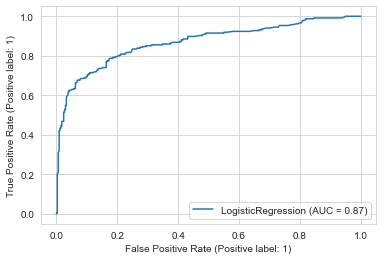

In [435]:
#Let's see how well our model works on training data.
plot_roc_curve(logreg,x_train,y_train)
plt.show()

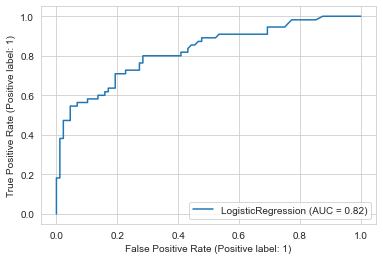

In [436]:
#performance of model on test data
plot_roc_curve(logreg,x_test,y_test)
plt.show()

# SAVING THE BEST MODEL USING PICKLE

In [437]:
#Importing pickle to save the best model
import pickle

#Saving the best model to the local file system
filename = 'Best_model.pickle'
pickle.dump(logreg, open('logreg_model', 'wb'))

In [438]:
#importing saved model
saved_model = pickle.load(open('logreg_model','rb'))

In [439]:
result = saved_model.predict(x_test)
result

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [440]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
act_pred = pd.DataFrame({'Actual Survived': y_test, 'Predicted Survived': result})
act_pred

,Actual Survived,Predicted Survived
789,0,0
114,0,1
92,0,0
51,0,0
539,1,1
...,...,...
528,0,0
448,1,1
263,0,0
355,0,0


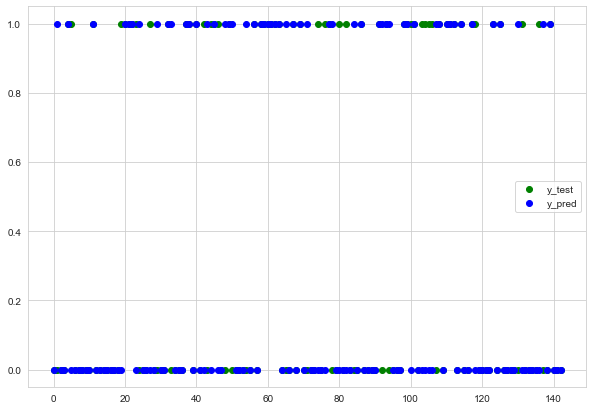

In [443]:
# Visualize Actual vs Predicted survival
fig = plt.figure(figsize=(10,7))
plt.scatter(range(y_test.shape[0]), y_test, color="green", label ="y_test")
plt.scatter(range(y_test.shape[0]), result, color="blue", label = "y_pred")
plt.legend();